In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.9.0'

In [4]:
tf.__version__

'2.9.1'

In [5]:
fashion_mnist=keras.datasets.fashion_mnist

In [6]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\banty_ewxe1fw\\AppData\\Roaming\\Python\\Python39\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [7]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

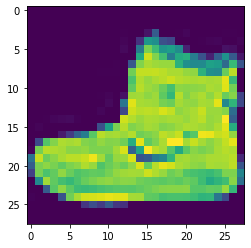

In [8]:
plt.imshow(x_train_full[0])

In [9]:
y_train_full[0]

9

In [10]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","shirt","Sneaker","Bag","Ankle boot"]

In [11]:
class_names[y_train_full[1]]

'T-shirt/top'

In [12]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

### Data normalization 
we then normalize teh data dimensitions so that they are of approximately the same scale

In [13]:
x_train_n=x_train_full/255.
x_test_n=x_test/255.

### Split the data into train/validation/test datasets

In [14]:
x_valid,x_train =x_train_n[:5000] , x_train_n[5000:]
y_valid,y_train =y_train_full[:5000] , y_train_full[5000:]
x_test = x_test_n

In [15]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
import pydot

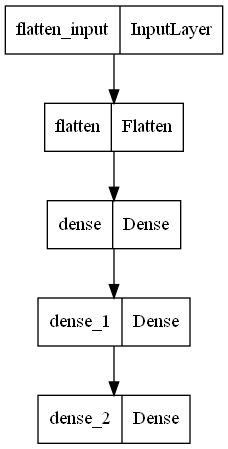

In [20]:
keras.utils.plot_model(model)

In [21]:
weights,biases=model.layers[1].get_weights()

In [22]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

In [27]:
model.compile(loss="sparse_categorical_crossentropy" ,
             optimizer="sgd",
             metrics=["accuracy"])

In [28]:
model_history=model.fit(x_train,y_train,epochs=30,
                       validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 18s 8ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4392 - accuracy: 0.8455 - val_loss: 0.5337 - val_accuracy: 0.7984
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3921 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3939 - accuracy: 0.8618 - val_loss: 0.3750 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3753 - accuracy: 0.8675 - val_loss: 0.3703 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3632 - accuracy: 0.8716 - val_loss: 0.3619 - val_ac

In [30]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
model_history.history

{'loss': [0.7236780524253845,
  0.4842923581600189,
  0.43919673562049866,
  0.41247543692588806,
  0.3939182162284851,
  0.3752616047859192,
  0.3632253408432007,
  0.35186830163002014,
  0.341603547334671,
  0.3321494460105896,
  0.32416215538978577,
  0.3150116801261902,
  0.3082337975502014,
  0.3021402955055237,
  0.2948046028614044,
  0.2891809344291687,
  0.2839951813220978,
  0.27788659930229187,
  0.2729426622390747,
  0.2675706446170807,
  0.2625528573989868,
  0.25783461332321167,
  0.25354886054992676,
  0.2486323118209839,
  0.24452710151672363,
  0.2406538873910904,
  0.2365475296974182,
  0.2329326719045639,
  0.22849802672863007,
  0.22538699209690094],
 'accuracy': [0.7644181847572327,
  0.8317999839782715,
  0.8455272912979126,
  0.8564000129699707,
  0.8617636561393738,
  0.8674545288085938,
  0.8715636134147644,
  0.8747090697288513,
  0.878745436668396,
  0.8822363615036011,
  0.8838182091712952,
  0.8864908814430237,
  0.8890363574028015,
  0.8917636275291443,
  0

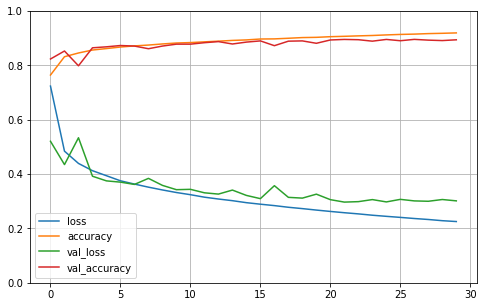

In [34]:
import pandas as pd 
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [35]:
model_history=model.fit(x_train,y_train,epochs=30,
                       validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2208 - accuracy: 0.9202 - val_loss: 0.2890 - val_accuracy: 0.8954
Epoch 2/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2177 - accuracy: 0.9217 - val_loss: 0.2921 - val_accuracy: 0.8968
Epoch 3/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2140 - accuracy: 0.9224 - val_loss: 0.3818 - val_accuracy: 0.8602
Epoch 4/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2107 - accuracy: 0.9247 - val_loss: 0.2903 - val_accuracy: 0.8966
Epoch 5/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2087 - accuracy: 0.9242 - val_loss: 0.2824 - val_accuracy: 0.8984
Epoch 6/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2033 - accuracy: 0.9273 - val_loss: 0.2990 - val_accuracy: 0.8914
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2006 - accuracy: 0.9288 - val_loss: 0.2913 - val_ac

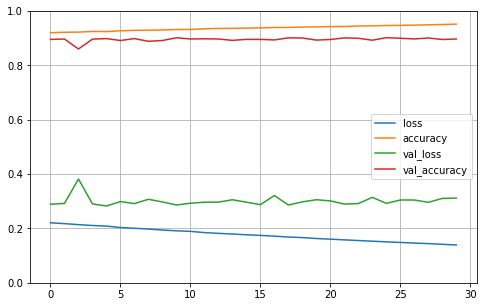

In [36]:
import pandas as pd 
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
model_history=model.fit(x_train,y_train,epochs=30,
                       validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1358 - accuracy: 0.9521 - val_loss: 0.3003 - val_accuracy: 0.8966
Epoch 2/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1346 - accuracy: 0.9526 - val_loss: 0.3145 - val_accuracy: 0.8916
Epoch 3/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.1323 - accuracy: 0.9529 - val_loss: 0.3698 - val_accuracy: 0.8754
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1295 - accuracy: 0.9543 - val_loss: 0.2967 - val_accuracy: 0.9006
Epoch 5/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1291 - accuracy: 0.9535 - val_loss: 0.2979 - val_accuracy: 0.9030
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1256 - accuracy: 0.9558 - val_loss: 0.3293 - val_accuracy: 0.8946
Epoch 7/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.1236 - accuracy: 0.9572 - val_loss: 0.3211 - val_ac

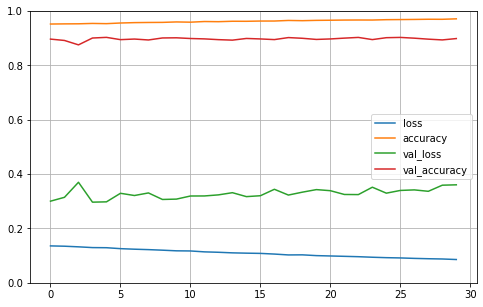

In [38]:
import pandas as pd 
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [39]:
model.evaluate(x_train,y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9687


[0.08863592892885208, 0.9686545729637146]

In [40]:
x_new=x_test[:3]

In [41]:
y_proba=model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 170ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [56]:
y_pred=np.argmax(model.predict(x_new),axis=1)
y_pred

1/1 [==============================] - 0s 25ms/step


array([9, 2, 1], dtype=int64)

In [54]:
 np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


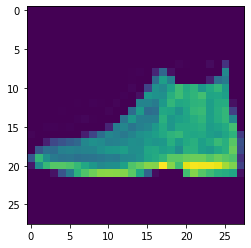

In [57]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


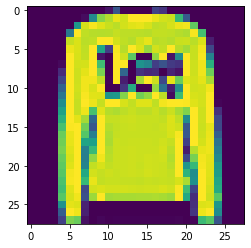

In [58]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


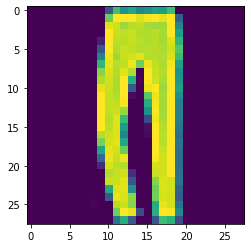

In [59]:
print(plt.imshow(x_test[2]))